# Integrantes:
- Jorge Eduardo Rodriguez Cardozo - 200711501
- German Augusto Carvajal Murcia -  201313516

# Exercise 02

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
with zipfile.ZipFile('/Users/germancarvajal/Dropbox/Universidad-201818/Deep_learning_y_redes_neuronales/AppliedDeepLearningClass/datasets/income.csv.zip', 'r') as z:
    f = z.open('income.csv')
    income = pd.read_csv(f, index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [2]:
income.shape

(32561, 15)

# Exercise 2.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

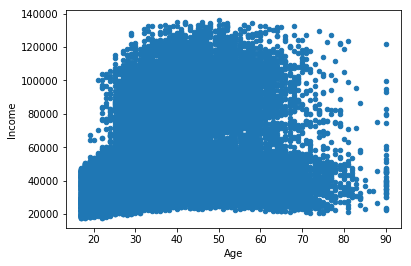

In [3]:
income.plot(x='Age', y='Income', kind='scatter')

In [5]:
X=np.log(income[['Age']].values)
Y=income[['Income']].values
from sklearn.linear_model import LinearRegression
logreg = LinearRegression(fit_intercept=True)
logreg.fit(X,Y)
print(logreg.coef_)
print(logreg.intercept_)

[[23867.16759366]]
[-32212.03803845]


Running a regression of the form $$ Income_i=\beta_0+\beta_1*log(Age_i)+\epsilon_i $$

is possible to state that a 1% increase in the age is associated with a USD$238 increase in the income

In [9]:
X=income[['Age']].values
Y=income[['Income']].values
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X,Y)
linreg.predict(np.array([30,40]).reshape(-1,1))

array([[48803.11784304],
       [54224.79441376]])

Running a regression of the form $$ Income_i=\beta_0+\beta_1*Age_i+\epsilon_i $$

is possible to state on average a person with 30 years has an income of USD43381, whilst a 40 year old should have an expected income of USD$48803

# Exercise 2.2
Evaluate the model using the MSE

In [10]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(Y, linreg.predict(X)))

MSE: 593783043.8402297



# Exercise 2.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [11]:
X=income[['Age']].values
X=np.hstack((X,np.square(X)))
linreg2 = LinearRegression(fit_intercept=True)
linreg2.fit(X,Y)
print(linreg2.coef_)
print(linreg2.intercept_)

[[3131.77014151  -30.54341041]]
[-16225.07097408]


Running a regression of the form $$ Income_i=\beta_0+\beta_1*Age_i+\beta_2*Age_i^2+\epsilon_i $$

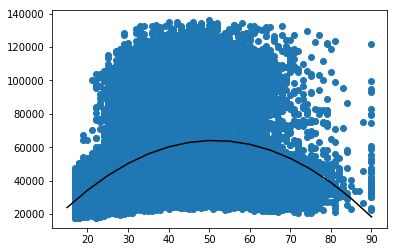

In [8]:
X=income[['Age']].values
plt.scatter(X, Y)
X2=np.arange(15,95,5).reshape(-1,1)
X2=np.hstack((X2,np.square(X2)))
plt.plot(range(15,95,5), linreg2.predict(X2) , color='black')
plt.show()

# Exercise 2.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [12]:
X=income[['Age','Education-Num']].copy()
X=X.join(pd.get_dummies(income[['Martial Status']]))
X=X.join(pd.get_dummies(income[['Race']]))
X=X.join(pd.get_dummies(income[['Sex']]))
X=X.drop('Martial Status_Never-married',axis=1)
X=X.drop('Race_White',axis=1)
X=X.drop('Sex_Male',axis=1)
X['Age2']=np.square(income.Age)

In [13]:
linreg3 = LinearRegression(fit_intercept=True)
linreg3.fit(X,Y)
m=pd.DataFrame(X.columns,columns=['Features'])
m['Coefficients']=linreg3.coef_.reshape(-1,1)
m

,Features,Coefficients
0,Age,1638.125249
1,Education-Num,3703.502871
2,Martial Status_Divorced,-1720.595637
3,Martial Status_Married-AF-spouse,12748.521520
4,Martial Status_Married-civ-spouse,12250.115558
5,Martial Status_Married-spouse-absent,49.249023
6,Martial Status_Separated,-333.541963
7,Martial Status_Widowed,-599.574616
8,Race_Amer-Indian-Eskimo,-3028.825058
9,Race_Asian-Pac-Islander,-1055.936405


In [14]:
print('MSE:', metrics.mean_squared_error(Y, linreg3.predict(X)))

MSE: 322172102.82947606


By using other aditional features the MSE is reduced from 593783043.84 to 322172102.829, meaning a 45% reduction in the prediction error

# Exercise 2.5


Estimate a logistic regression to predict if a person is in the United States.

What is the performance of the model

In [15]:
income['isUS'] = (income['Country'] == 'United-States')*1.0
income['isUS'].value_counts()

1.0    29170
0.0     3391
Name: isUS, dtype: int64

In [16]:
from sklearn.linear_model import LogisticRegression
X=X.join(income['Income'])
Y=income['isUS'].copy()

In [17]:
logi=LogisticRegression()
logi.fit(X,Y)
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score
print('Acuracy: '+ str(metrics.accuracy_score(Y, logi.predict(X))))
print('precision_score ', precision_score(Y, logi.predict(X)))
print('recall_score    ', recall_score(Y, logi.predict(X)))
print('f1_score    ', f1_score(Y, logi.predict(X)))
print('F_beta_score    ', fbeta_score(Y, logi.predict(X),beta=10))
print('AUC    ', metrics.roc_auc_score(Y, logi.predict_proba(X)[:,1]))

Acuracy: 0.895857006848684
precision_score  0.895857006848684
recall_score     1.0
f1_score     0.9450681181254151
F_beta_score     0.9988503373891912
AUC     0.5624397528516014


The classification model has a high precision of almost 90%, a hundred percent recall score and a high precision score of 0.89. This leads to both 0.94 f1 score and 0.99 fBeta score. At first glance all of the performance indicator evaluate the model as a good classification tool, but when looking at the AUC is obvious that the model has a poor identification capacity, something observable in the conffusion matrix where the model is always predicting a location in the US due to the unbalancing in the sample.

In [18]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[    0  3391]
 [    0 29170]]


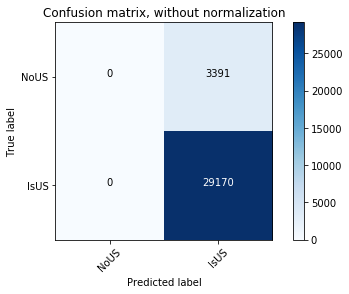

In [19]:
np.set_printoptions(precision=2)
plot_confusion_matrix(metrics.confusion_matrix(Y,logi.predict(X)), classes=['NoUS','IsUS'],title='Confusion matrix, without normalization')